In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##6个波段的栅格数据
path_img = 'E:\开源\cg_20.tif'

In [3]:
dset=gdal.Open(path_img)
img_array = dset.ReadAsArray()
print(img_array.shape)

(6, 1631, 1490)


In [4]:
band_green = dset.GetRasterBand(2).ReadAsArray().astype(np.float16)
band_swir = dset.GetRasterBand(4).ReadAsArray().astype(np.float16)
band_swir
mndwi = (band_green-band_swir)/(band_green+band_swir+0.000001)

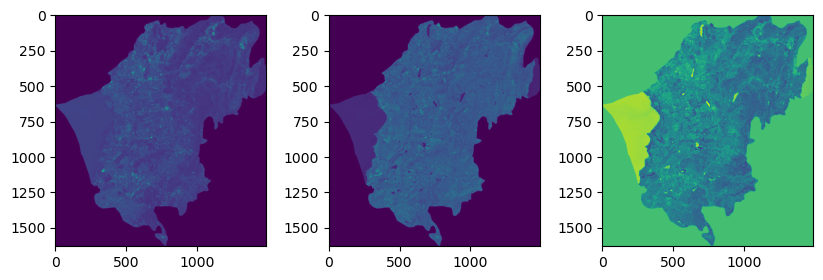

In [5]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1);plt.imshow(band_green)
plt.subplot(1,3,2);plt.imshow(band_swir)
plt.subplot(1,3,3);plt.imshow(mndwi)

In [6]:
id_valid = np.where(band_green !=0)
id_invalid = np.where(band_green==0)

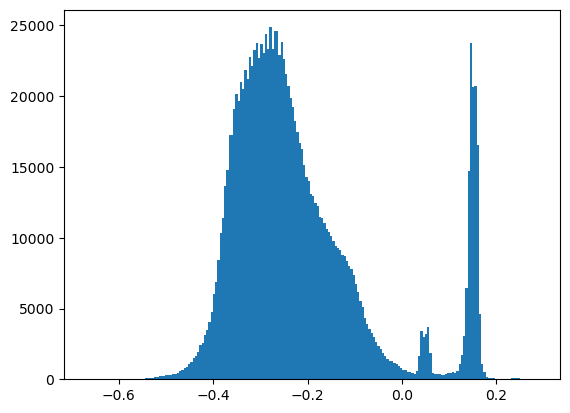

In [7]:
_ = plt.hist(mndwi[id_valid],bins=200)

In [8]:
thre = 0.1
mndwi_seg = np.where(mndwi>0.1, 1, 0)
mndwi_seg[id_invalid]=-1


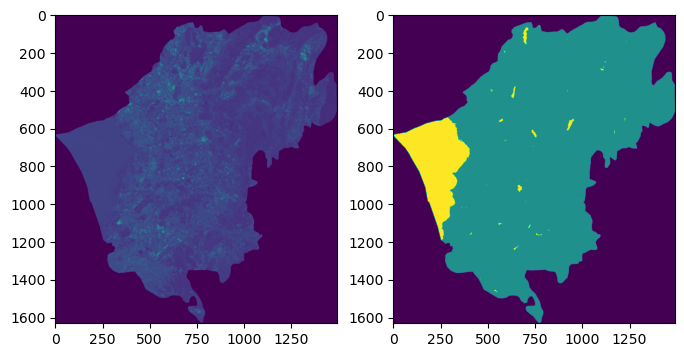

In [9]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);plt.imshow(band_green)
plt.subplot(1,2,2);plt.imshow(mndwi_seg)


In [14]:
path_out = 'E:\开源\11'
driver = gdal.GetDriverByName('GTiff')
outdset = driver.Create(path_out, xsize=dset.RasterXSize,ysize=dset.RasterYSize,bands=1,
eType=gdal.GDT_Int16)

outdset.SetGeoTransform(dset.GetGeoTransform())
outdset.SetProjection(dset.GetProjection())
out_band = outdset.GetRasterBand(1)
out_band.WriteArray(mndwi_seg)
outdset = None

AttributeError: 'NoneType' object has no attribute 'SetGeoTransform'